# Compartimental vs Networked Epidemics

We consider a SITR(Susceptible-Infectious-Treated-Recovery) model, with thw following dynamics equations:
$$\dot{S} = - \beta \, S \,(I + \delta \, T)$$
$$\dot{I} = \beta \, S \,(I + \delta \, T) - (\alpha \, + \gamma) \, I$$
$$\dot{R} = \gamma \, I + \eta \, T $$
$$\dot{T} = - \eta \, T + \alpha \, I $$
___


## *Compartimental model*


In [2]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from graph import Graph,rounding,latex
import scienceplots
plt.style.use(['science','notebook','grid'])

In [3]:
# SITR model
def sitr_model(t,x,*args):
    S,I,R,T = x
    beta,gamma,alpha,delta,eta = args
    dS = - beta*S*(I+delta*T)
    dI = beta*S*(I+delta*T) - (alpha+gamma)*I
    dR = gamma*I + eta*T
    dT = - eta*T + alpha*I
    return dS,dI,dR,dT

### Scenario 1


The first scenario we consider is the one in wich the $R_0 = \frac{\beta}{\gamma}$ is less than $1$

In [4]:
# Parameters suc that R_0 < 0
beta, gamma, alpha, delta, eta = 0.1, 0.2, 0.1, 0.5, 0.1
params = beta, gamma, alpha, delta, eta

# Time interval
time_interval = (0,100)

#evaluation points
time_eval = np.linspace(0,100,1000)

# Initial condition
S_0 = 0.7
I_0 = 0.3
R_0 = 0
T_0 = 0 

initial_condition = S_0,I_0,R_0,T_0

simulation1 = solve_ivp(sitr_model, time_interval,initial_condition,args=(params),dense_output=True, t_eval=time_eval)


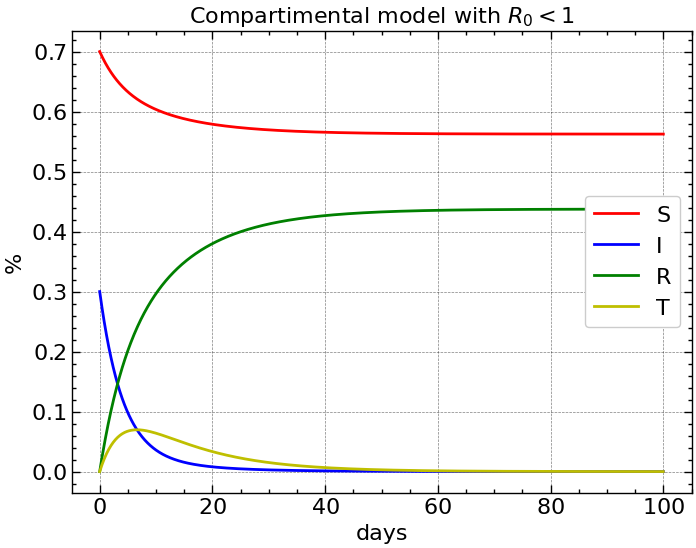

In [5]:
#plotting 
plt.plot(simulation1.t,simulation1.y[0], color='r', label='S')
plt.plot(simulation1.t,simulation1.y[1], color='b', label='I')
plt.plot(simulation1.t,simulation1.y[2], color='g', label='R')
plt.plot(simulation1.t,simulation1.y[3], color='y', label='T')
plt.xlabel('days')
plt.ylabel('%')
plt.legend(loc='center right')
plt.title('Compartimental model with $R_0 < 1$')
plt.savefig("Compartimaneta scenario 1.png")
plt.show()


### Scenario 2

The first scenario we consider is the one in wich the $R_0 = \frac{\beta}{\gamma}$ is greater than $1$

In [6]:
# Parameters such that R_0 > 0
beta, gamma, alpha, delta, eta = 0.4, 0.1, 0.1, 0.5, 0.1
params = beta, gamma, alpha, delta, eta

# Initial condition
S_0 = 0.7
I_0 = 0.3
R_0 = 0
T_0 = 0 

initial_condition = S_0,I_0,R_0,T_0

simulation2 = solve_ivp(sitr_model, time_interval,initial_condition,args=(params),t_eval=time_eval)


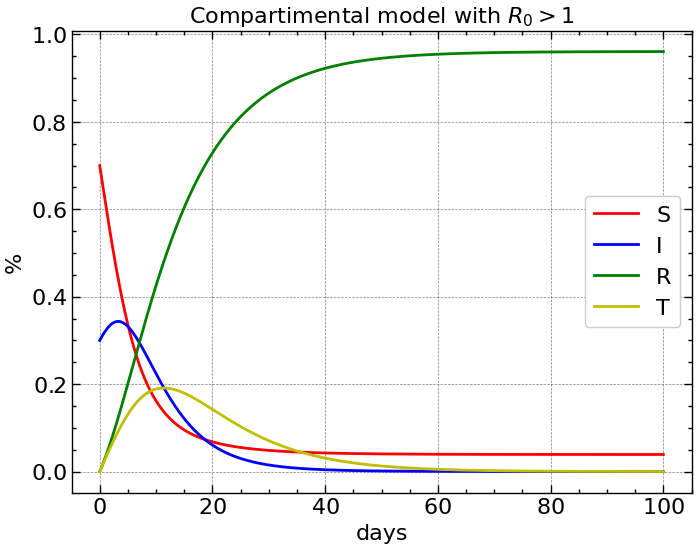

In [7]:

plt.plot(simulation2.t,simulation2.y[0], color='r', label='S')
plt.plot(simulation2.t,simulation2.y[1], color='b', label='I')
plt.plot(simulation2.t,simulation2.y[2], color='g', label='R')
plt.plot(simulation2.t,simulation2.y[3], color='y', label='T')
plt.xlabel('days')
plt.ylabel('%')
plt.legend(loc='center right')
plt.title('Compartimental model with $R_0 > 1$')
plt.savefig("Compartimental scenario 2.png")
plt.show()


### Role of $\delta$

In [8]:
# Parameters such that delta >> 0
beta, gamma, alpha,eta = 0.4, 0.1, 0.1, 0.1
delta = 0.995
params = beta, gamma, alpha, delta, eta


# Initial condition
S_0 = 0.7
I_0 = 0.3
R_0 = 0
T_0 = 0 

initial_condition = S_0,I_0,R_0,T_0

simulation3 = solve_ivp(sitr_model, time_interval,initial_condition,args=(params),t_eval=time_eval)


In [9]:
# Parameters such that delta ~= 0
beta, gamma, alpha, eta = 0.4, 0.1, 0.1, 0.1
delta = 0.005
params = beta, gamma, alpha, delta, eta

# Initial condition
S_0 = 0.7
I_0 = 0.3
R_0 = 0
T_0 = 0 

initial_condition = S_0,I_0,R_0,T_0

simulation4 = solve_ivp(sitr_model, time_interval,initial_condition,args=(params),t_eval=time_eval)


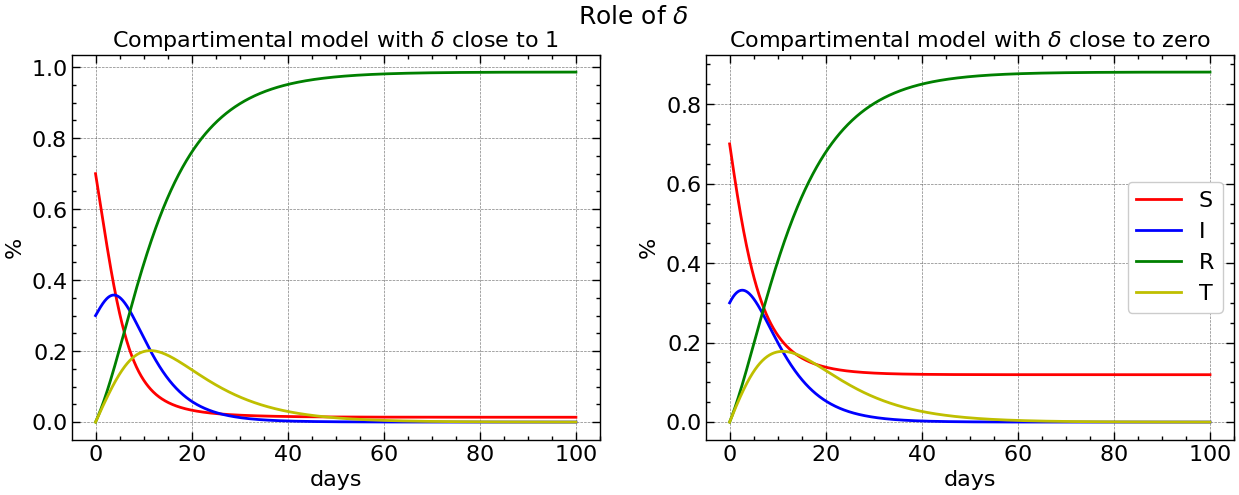

In [10]:
figure,axes = plt.subplots(1,2, figsize=(15,5))
ax = axes[0]
ax.plot(simulation3.t,simulation3.y[0], color='r', label='S')
ax.plot(simulation3.t,simulation3.y[1], color='b', label='I')
ax.plot(simulation3.t,simulation3.y[2], color='g', label='R')
ax.plot(simulation3.t,simulation3.y[3], color='y', label='T')
ax.set_xlabel('days')
ax.set_ylabel('%')
#ax.legend(loc='center right')
ax.set_title('Compartimental model with $\delta$ close to 1')
ax = axes[1]
ax.plot(simulation4.t,simulation4.y[0], color='r', label='S')
ax.plot(simulation4.t,simulation4.y[1], color='b', label='I')
ax.plot(simulation4.t,simulation4.y[2], color='g', label='R')
ax.plot(simulation4.t,simulation4.y[3], color='y', label='T')
ax.set_xlabel('days')
ax.set_ylabel('%')
ax.legend(loc='center right')
ax.set_title('Compartimental model with $\delta$ close to zero')
figure.suptitle('Role of $\delta$', fontsize=18)
plt.savefig("Role of delta.png")
plt.show()


___

## *Networked-based model*

In [11]:
# Generation of a random weight matrix 
N = 500
W = np.random.choice([0,1], size=(N,N), p=[0.999,0.001])
W = (W + W.T)/2

for i in range(N):
    for j in range(N):
        if W[i,j] != 0:
            W[i,j] = 1

G = Graph(W)


In [12]:
def simulation(infected, susceptible, days, N, G):

    individuals = np.random.choice((1,2),N, p=[susceptible,infected])
    
    bulletin = np.zeros((4,days))
    
    for day in range(days):
    
        # check for every individuals
        for i in range(len(individuals)):
        
            # individual is susceptible
            if individuals[i]==1:
                for neighbor in G.neighbor(i):
                    if individuals[neighbor] == 2 and np.random.uniform(0,1) <= beta:
                        individuals[i] = 2
                    elif individuals[neighbor] == 3 and np.random.uniform(0,1) <= delta:
                        individuals[i] = 2

            # individual is infected
            elif individuals[i] == 2:
                for neighbor in G.neighbor(i):
                    if np.random.uniform(0,1) <= alpha:
                        individuals[i] = 3
                    elif np.random.uniform(0,1) <= gamma:
                        individuals[i] = 4
                        
            # individual is treated
            elif individuals[i] == 3:
                if np.random.uniform(0,1) <= eta:
                    individuals[i] = 4
    
        bulletin[0,day] = np.count_nonzero(individuals == 1)/N  #S
        bulletin[1,day] = np.count_nonzero(individuals == 2)/N  #I
        bulletin[2,day] = np.count_nonzero(individuals == 3)/N  #T
        bulletin[3,day] = np.count_nonzero(individuals == 4)/N  #R
    
    return bulletin

### Scenario 1

In [13]:
# initialization of nodes
infected = 0.3
susceptible = 0.7
treated = 0
recover = 0

days = 100

#parameters
beta, gamma, alpha, delta, eta = 0.1, 0.2, 0.1, 0.5, 0.1

bulletin1 = simulation(infected, susceptible,days,N,G)

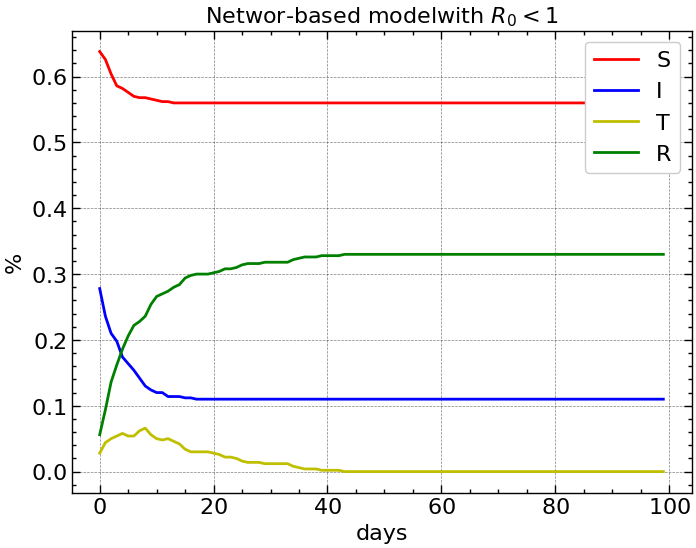

In [14]:

t = np.linspace(0,days-1,days)
plt.figure()
plt.plot(t, bulletin1[0,:], color='r', label = "S")
plt.plot(t, bulletin1[1,:], color='b', label = "I")
plt.plot(t, bulletin1[2,:], color='y', label = "T")
plt.plot(t, bulletin1[3,:], color='g', label = "R")
plt.legend(loc='upper right')
plt.xlabel('days')
plt.ylabel('%')
plt.title('Networ-based modelwith $R_0 < 1$')
plt.savefig("Network based scenario 1")
plt.show()

### Scenario 2

In [15]:
# initialization of nodes
infected = 0.3
susceptible = 0.7
treated = 0
recover = 0

#parameters
beta, gamma, alpha, delta, eta = 0.4, 0.1, 0.1, 0.5, 0.1

bulletin2 = simulation(infected, susceptible,days,N,G)

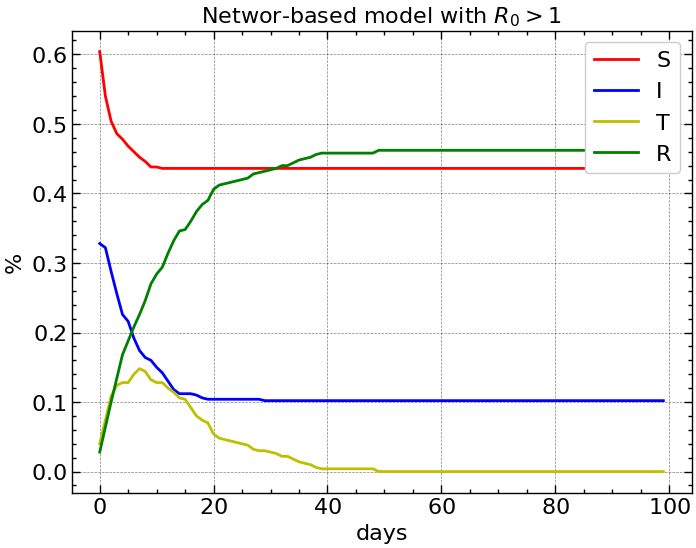

In [16]:

t = np.linspace(0,days-1,days)
plt.figure()
plt.plot(t, bulletin2[0,:], color='r', label = "S")
plt.plot(t, bulletin2[1,:], color='b', label = "I")
plt.plot(t, bulletin2[2,:], color='y', label = "T")
plt.plot(t, bulletin2[3,:], color='g', label = "R")
plt.legend(loc='upper right')
plt.xlabel('days')
plt.ylabel('%')
plt.title('Networ-based model with $R_0 >1$')
plt.savefig("Networked based scenario 2.png")
plt.show()

## Model comparison

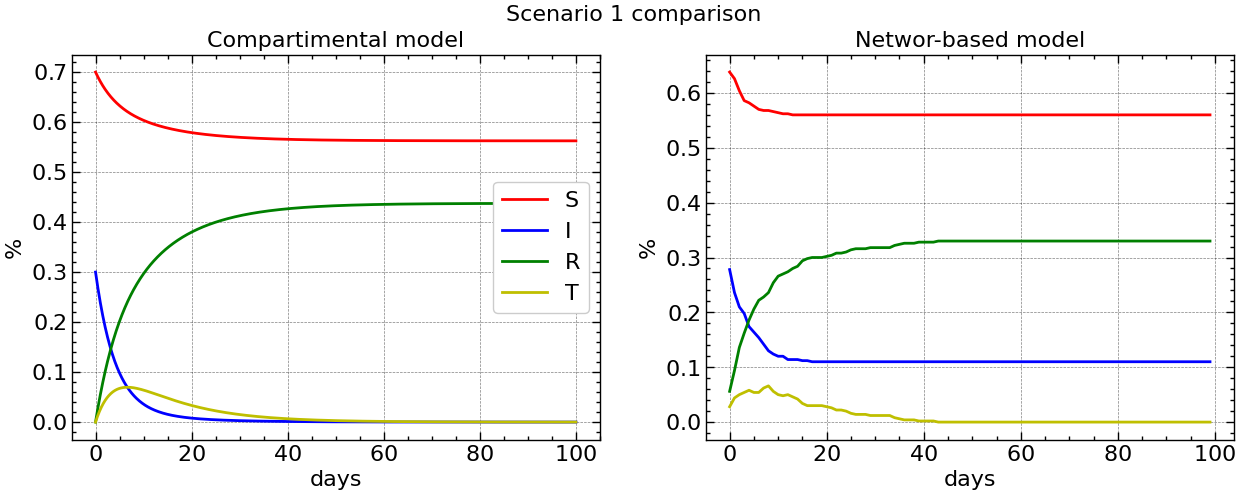

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
ax = axes[0]
ax.plot(simulation1.t,simulation1.y[0], '-', color='r', label='S')
ax.plot(simulation1.t,simulation1.y[1], '-', color='b', label='I')
ax.plot(simulation1.t,simulation1.y[2], '-', color='g', label='R')
ax.plot(simulation1.t,simulation1.y[3], '-', color='y', label='T')
ax.set_xlabel('days')
ax.set_ylabel('%')
ax.legend(loc='center right')
ax.set_title('Compartimental model')
ax = axes[1]
ax.plot(t, bulletin1[0,:], '-', color='r')
ax.plot(t, bulletin1[1,:], '-', color='b')
ax.plot(t, bulletin1[2,:], '-', color='y')
ax.plot(t, bulletin1[3,:], '-', color='g')
ax.set_xlabel('days')
ax.set_ylabel('%')
ax.set_title('Networ-based model')
fig.suptitle('Scenario 1 comparison', fontsize=16)
plt.savefig("Comparison scenario 1.png")
plt.show()


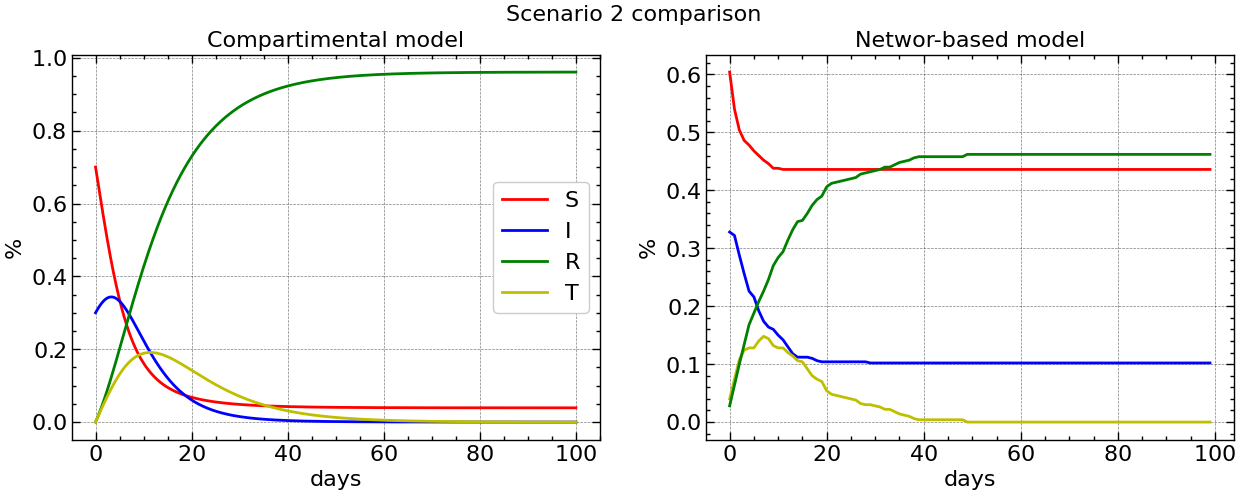

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
ax = axes[0]
ax.plot(simulation2.t,simulation2.y[0], '-', color='r', label='S')
ax.plot(simulation2.t,simulation2.y[1], '-', color='b', label='I')
ax.plot(simulation2.t,simulation2.y[2], '-', color='g', label='R')
ax.plot(simulation2.t,simulation2.y[3], '-', color='y', label='T')
ax.set_xlabel('days')
ax.set_ylabel('%')
ax.legend(loc='center right')
ax.set_title('Compartimental model')
ax = axes[1]
ax.plot(t, bulletin2[0,:], '-', color='r')
ax.plot(t, bulletin2[1,:], '-', color='b')
ax.plot(t, bulletin2[2,:], '-', color='y')
ax.plot(t, bulletin2[3,:], '-', color='g')
ax.set_xlabel('days')
ax.set_ylabel('%')
ax.set_title('Networ-based model')
fig.suptitle('Scenario 2 comparison', fontsize=16)
plt.savefig("Comparison scenario 2.png")
plt.show()